In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Problem 1



In [2]:
def shift_fuct(any_array,shift_amount):
    g = np.zeros(len(any_array)) #generate an array of zeros with the same length as input array
    g[shift_amount]=1# sets an item to be one at the index equal to length of the array
    array_ft2 = np.fft.fft(g)
    array_ft = np.fft.fft(any_array)
    return np.real(np.fft.ifft(array_ft*array_ft2))

Shift Value: 4


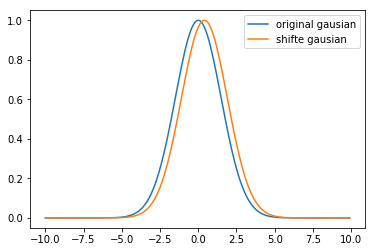

In [3]:
x = np.arange(-10,10,.1)
y = np.exp(-0.5*x**2/(1.5**2))
h = shift_fuct(x,int(input('Shift Value: ')))
y2 = np.exp(-0.5*h**2/(1.5**2))
plt.plot(x,y,label='original gausian')
plt.plot(x,y2,label='shifte gausian')
plt.legend()
plt.show()

### Problem 2

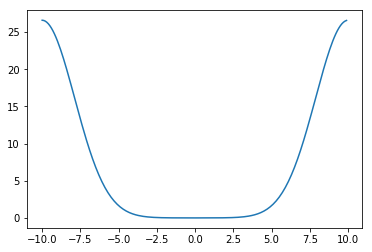

In [4]:
def corr_fuct(array1,array2):
    array1_fft = np.fft.fft(array1)
    array2_fft = np.fft.fft(array2)
    return np.real(np.fft.ifft(array1_fft*np.conj(array2_fft)))
plt.plot(x,corr_fuct(y,y))
plt.show()

### Problem 3


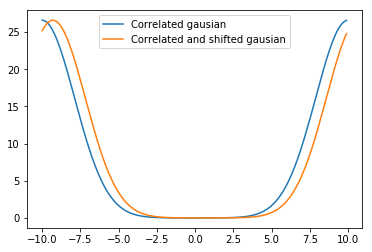

In [5]:
def shift_corr(array1,array2,shift_amount):
    corr_fuc=0
    if array1.all()==array2.all():
        corr_fuc = corr_fuct(array1,array1)
    else:
        corr_fuc = corr_fuct(array1,array2)
    return shift_fuct(corr_fuc,shift_amount)
plt.plot(x,corr_fuct(y,y),label='Correlated gausian')
plt.plot(x,shift_corr(y,y,7),label='Correlated and shifted gausian')
plt.legend()
plt.show()

### Problem 4

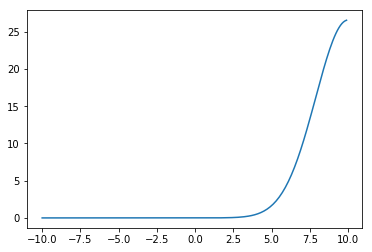

In [8]:
def remove_wrap(array1,array2):
    array12 = np.zeros(2*len(array1))
    array12[:len(array1)] = array1
    array1fft = np.fft.fft(array12)
    array22 = np.zeros(2*len(array2))
    array22[:len(array2)] = array2
    array2fft = np.fft.fft(array22)
    a = np.real(np.fft.ifft(array2fft*array1fft))
    return a[:len(array1)]
plt.plot(x,remove_wrap(y,y))
plt.show()

### Problem 5 

In [42]:
class Complex:
    def __init__(self,r=0.0,i=0.0):
        self.r=r
        self.i=i
    def absl(self):
        y=np.sqrt(self.r**2+self.i**2)
        return y
    def sub(self,x):
        real2 = self.r - x.r
        im2 = self.i - x.i
        return Complex(real2,im2)
    def add(self,y):
        real = self.r + y.r
        im = self.i + y.i
        return Complex(real,im)
    def mult(self,z):
        real3 = (self.r*z.r)-(self.i*z.i)
        im3 = (self.r*z.i)+(z.r*self.i)
        return Complex(real3,im3)
    def div(self,d):
        real4 = ((self.r*d.r)+(self.i*d.i))/(d.r**2+d.i**2)
        im4 = ((self.i*d.r)-(self.r*d.i))/(d.r**2+d.i**2)
        return Complex(real4,im4)
        
  
        
    
    
                  

In [43]:
a=Complex(2,3) 
b=Complex(2,4)
z=b.sub(a) 
z2 =b.add(a) # b+a = z2
z3 = a.mult(b) # b*a  = z3
z4 = a.div(b) # a/b = z4
print(a.absl())
print((z.r,z.i), 'results for addition')
print((z2.r,z2.i),'results for subtraction')
print((z3.r,z3.i),'results for multiplication')
print((z4.r,z4.i),'results for division')

3.605551275463989
(0, 1)
(4, 7)
(-8, 14)
(0.8, -0.1)


2
